In [1]:
# Este notebook tem caráter de estudo. Não é pretendido, portanto, inferir qualquer resultado ou insight verossimilhante.
# Será aplicado, tecnicas de manipulação numérica com numpy, um pseudo-tratamento, visualização e elaboração de algo que se assemelha com uma reta de minimos
# quadrados a respeito dos indices de felicidade mundial, mas especificamente: como a felicidade evolui ao longo de alguns outros parametros!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chardet

In [3]:
url_happiness_rate = r'/content/World-happiness-report-2024.csv'
url_time_evaluate = r'/content/World-happiness-report-updated_2024.csv'

In [5]:
happiness_rate_data = pd.read_csv(url_happiness_rate)

# Do dataframe happiness_rate_data, separamos os 10 primeiros e os 10 ultimos para a nossa análise.

ten_higher = pd.DataFrame(happiness_rate_data.head(10)).reset_index()
ten_higher.drop('index', axis=1, inplace=True)

ten_lowest = pd.DataFrame(happiness_rate_data.tail(10).sort_values(by='Ladder score', ascending=False)).reset_index()
ten_lowest.drop('index', axis=1, inplace=True)

ten_higher


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


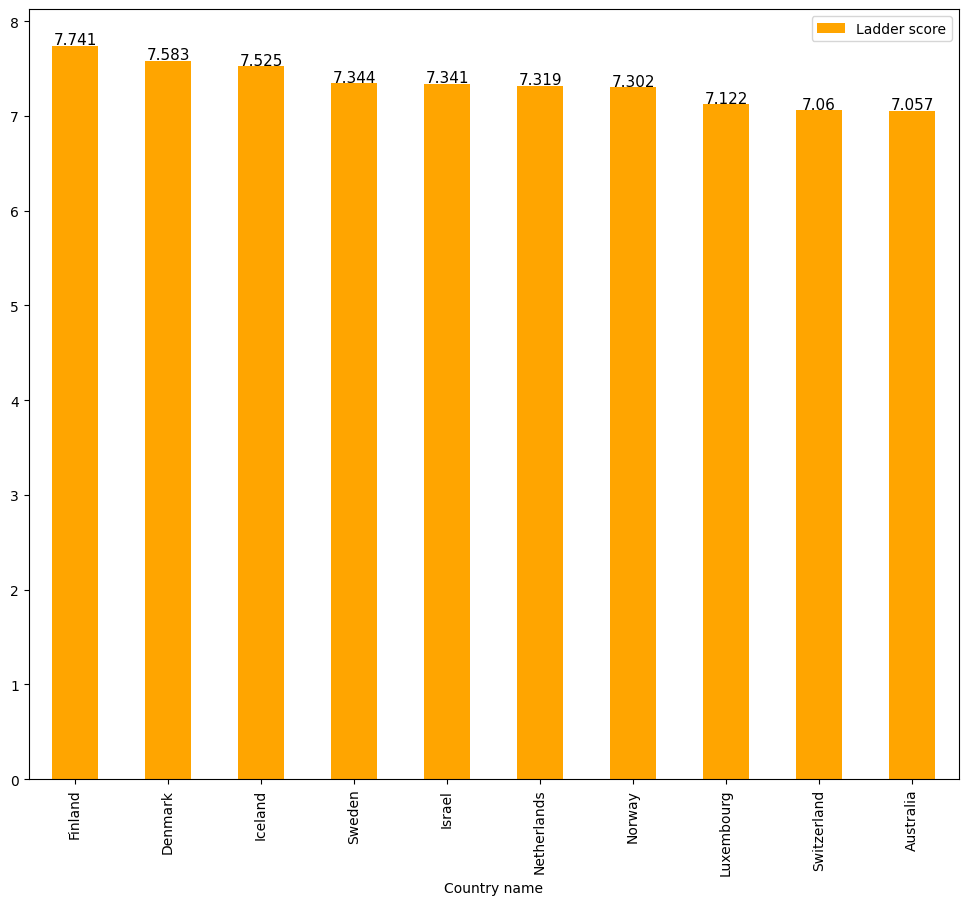

In [6]:
ten_higher_plot = ten_higher.plot(kind='bar', x='Country name', y='Ladder score', figsize=(12,10), color='orange')

for i in ten_higher_plot.patches:
  ten_higher_plot.annotate(
      i.get_height(),
      (i.get_x() + i.get_width() / 2, i.get_height()),
      ha='center', va='baseline',
      xytext=(0,1), textcoords= 'offset points',
      color='black', fontsize=11
  )

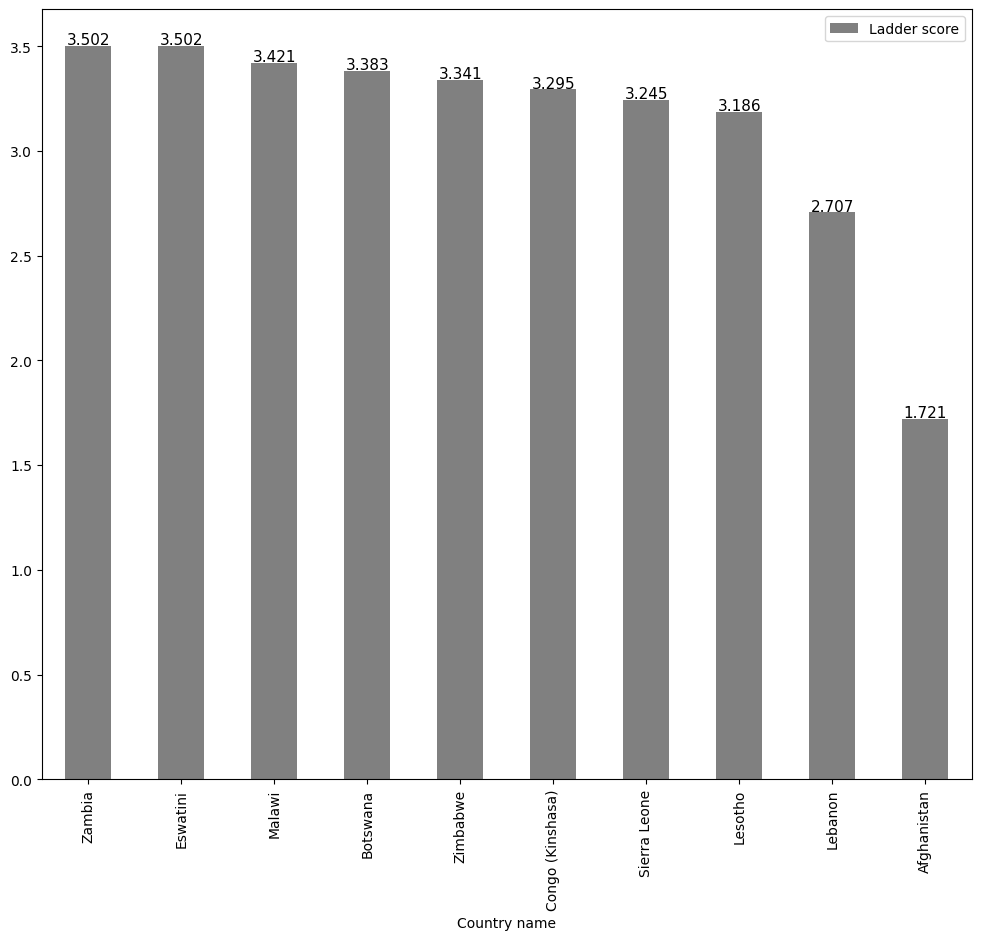

In [7]:
ten_lowest_plot = ten_lowest.plot(kind='bar', x='Country name', y='Ladder score', figsize=(12,10), color='grey')

for i in ten_lowest_plot.patches:
  ten_lowest_plot.annotate(
      i.get_height(),
      (i.get_x() + i.get_width() / 2, i.get_height()),
      ha='center', va='baseline',
      xytext=(0,1), textcoords= 'offset points',
      color='black', fontsize=11
  )

In [10]:
# ANÁLISE DOS GRÁFICOS:
# I. Predominância de países do suldoeste europeu entre os 10 mais felizes. Incluse, desses, apenas 2 fogem desse padrão: Israel e Australia
# II. Predominãncia de países da áfrica subsariana e alguns países sul asiaticos como libano e afeganistão.

# PARA A OBSERVAÇÃO DE PARAMETROS AO LONGO DO TEMPO, VAMOS SEPARAR O PAÍS MAIS FELIZ - FINLANDIA - E O MENOS - AFEGANISTÃO.

th_to_temporal_analysis = [i for i in ten_higher.sort_values('Ladder score', ascending=False).head()['Country name']]
tl_to_temporal_analysis = [i for i in ten_lowest.sort_values('Ladder score').head()['Country name']]

th_to_temporal_analysis

['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel']

In [11]:
# Existe a possibilidade de carregar os dados diretamente com o numpy, a partir de loadtxt ou genfromtxt
# inclusive, a segunda escolha é melhor visto que não temos certeza da formatação dos dados. Para evitar
# erros em datasets cuja verificação não pode ser feita manualmente devido ao tamanho, genfromtxt é mais
# viável devido a funções como filling_values, skip_header, etc.
# Apesar disso, para filtramos os dados a partir do nome dos países carregaremos os dados com pandas,
# visto que os arrays tem tipo pre-definido e não poderiamos misturar Country name com as outras estatísticas
# float64.

In [12]:
# o encoding foi definido com auxilio de ia generativa. apesar disso, a biblioteca chardet poderia fazer
# esse trabalho lendo todo o csv e definindo com, chardet.detect (apesar que de forma menos otimizada).

time_evaluate_data = pd.read_csv(url_time_evaluate, encoding='iso-8859-1')
time_evaluate_data.replace('', np.nan, inplace=True)
time_evaluate_data


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [13]:
newh_time_evaluate_data = time_evaluate_data[time_evaluate_data['Country name'].isin(th_to_temporal_analysis)]

In [14]:
newl_time_evaluate_data = time_evaluate_data[time_evaluate_data['Country name'].isin(tl_to_temporal_analysis)]

# existem bem menos dados, eram para ser 90 dados se houvesse a evolução contínua de 2005 até 2023.

In [15]:
finland_data = newh_time_evaluate_data[newh_time_evaluate_data['Country name'] == 'Finland'].copy(deep=True)
finland_data.drop('Country name', axis=1, inplace=True)

In [16]:
afghanistan_data = newh_time_evaluate_data[newh_time_evaluate_data['Country name'] == 'Afghanistan'].copy(deep=True)
afghanistan_data.drop('Country name', axis=1, inplace=True)

In [17]:
params = finland_data.columns

finland_data.to_csv('/content/finland_data', sep=',', index=False)
finland_array = np.loadtxt('/content/finland_data', delimiter=',', skiprows=1)


In [19]:
# theme - column
# -------------------------------------
# Log GDP per capita - 2
# Social support - 3
# Healthy life expectancy at birth - 4
# Perceptions of corruption - 7

In [23]:
finland_log_gdp_per_capita = finland_array[:,2]
finland_social_support = finland_array[:,3]
finland_healthy_life_expectancy_at_birth = finland_array[:,4]
finland_perceptions_of_corruption = finland_array[:,7]

In [ ]:
# X : FIXO = TEMPO

In [21]:
# USAREI INTERPOLAÇÃO LINEAR PARA DETERMINAR OS ANOS DE 2007 E 2009.
finland_2007 = np.mean(finland_array[0:2,:],axis=0)
finland_2009 = np.mean(finland_array[1:3,:],axis=0)

finland_array = np.vstack((finland_array, finland_2007))
finland_array = np.vstack((finland_array, finland_2009))



In [22]:
np.argsort(finland_array[:,0])
finland_array = finland_array[np.argsort(finland_array[:,0])]


In [24]:
finland_array


X = finland_array[:,0]
Y = finland_healthy_life_expectancy_at_birth

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.7978774085867766


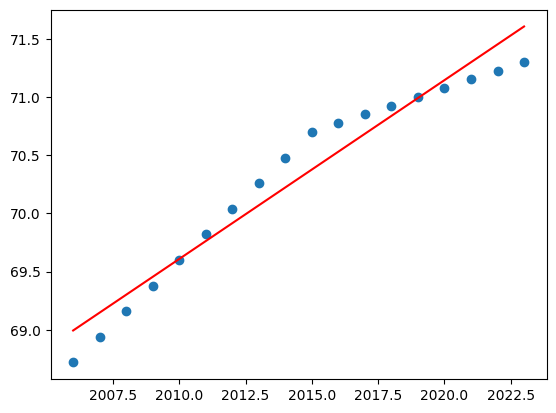

In [25]:
# RETA DE TENDÊNCIA DA TAXA DE EXPECTATIVA DE VIDA AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.scatter(X,Y)
plt.plot(X,y, color='red')
print(np.linalg.norm(Y-y))

In [26]:
X = finland_array[:,0]
Y = finland_log_gdp_per_capita

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.11349683768168412


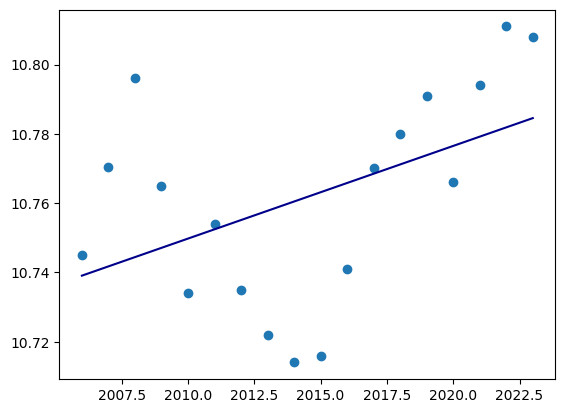

In [27]:
# RETA DE TENDÊNCIA DO pib per capta adaptado para o poder de compra em formato logaritimico AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.scatter(X,Y)
plt.plot(X,y, color='darkblue')
print(np.linalg.norm(Y-y))

In [28]:
X = finland_array[:,0]
Y = finland_social_support

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.050650063816033625


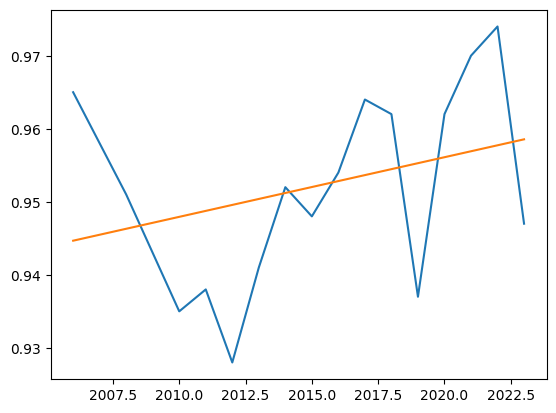

In [29]:
# RETA DE TENDÊNCIA DA AJUDA SOCIAL - PROVENIENTE DO GOVERNO - AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.plot(X,Y)
plt.plot(X,y)
print(np.linalg.norm(Y-y))

In [30]:
X = finland_array[:,0]
Y = finland_perceptions_of_corruption

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.294186532421648


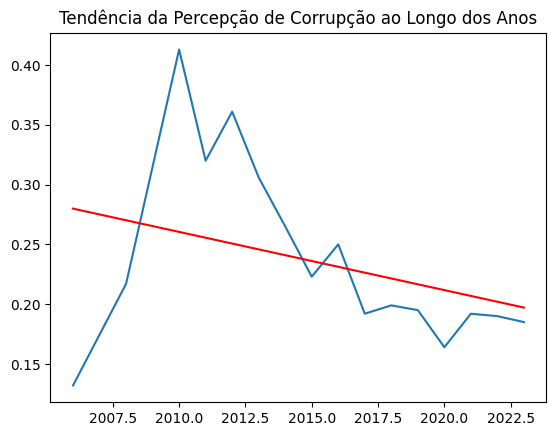

In [31]:
# RETA DE TENDÊNCIA DA PERCEPÇÃO DE CORRUPÇÃO POR PARTE DA POPULAÇÃO AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.plot(X,Y)
plt.title('Tendência da Percepção de Corrupção ao Longo dos Anos', loc='center')
plt.plot(X,y, color='red')
print(np.linalg.norm(Y-y))

In [32]:
# Notavelmente, o aumento da felicidade em um país está intimamente relacionado com bons índices de desenvolvimento humano. A Finlandia, país mais feliz do mundo, tem estatísticas
# que fazem jus ao título:
# No primeiro gráfico, a tendência ao longo dos anos exibe uma questão comum de países europeus e do norte da america anglo-saxonica. Além da simplicidade do envelhecimento
# geracional a Finlandia construiu com o passar dos anos um contexto ideal de envelhecimento ativo. Enfrentando desafios como a redução da população economicamente ativa, impasse
# comum a todos os demais países com essa caracteristica, a Finlandia adere, além das soluções mais trivais como programas de mobilização juvenil, o estimulo social e a
# manutenção da saúde mental e física da terceira idade como uma das respostas para reduzir os desafios de cuidar de uma população idosa.
# https://finland.fi/pt/vida-amp-sociedade/finlandia-permitindo-um-envelhecimento-ativo/#:~:text=A%20expectativa%20de%20vida%20m%C3%A9dia,de%20vida%20durante%20a%20velhice.

# No segundo gráfico, outra estatística felizmente crescente, o aumento significativo do pib per capta adaptado ao poder de compra em uma perspectiva mais recente. É interessante
# notar que em anos próximos a 2010 se iniciou um processo de baixa significativa nos valores referentes, chegando em seu mínimo no final de 2014 e começo de 2015, a partir do qual,
# se observa no ultimo gráfico, uma redução notável, que continua sendo percebida até hoje, nos índices de percepção de corrupção no país que teria chegado no seu ápice em 2010.
# Não obstante, nos anos em que a noção de corrupção eram maiores, tal qual o pib per capta pareado com poder de compra era menor, a ajuda social por parte dos governo finlandês
# atingiu seus valores mais baixos.

# Tudo isso leva a uma única conclusão, o título de país mais feliz do mundo foi uma construção das autoridades públicas responsáveis mediante a um sucetível investimento a
# longo prazo. Uma iniciativa visiónaria que recompensou a população e a própria nação.


In [ ]:
# Afeganistão:

In [33]:
afghanistan_data = newl_time_evaluate_data[newl_time_evaluate_data['Country name'] == 'Afghanistan']
afghanistan_data

# Assim como foi feito com o dataframe da Finlandia, será necessário tratar os valores NaN's. Como  em Log GDP os valores estão no final, não é possível interpolar de forma linear
# os valores. assim, será atribuido a esses valores a média dos demais, o mesmo procedimento em cada coluna com valor NaN.
# Além disso, assim como durante o tratamento dos dados da Finlandia, teremos que iterpolar linhas para atribuir um valor médio ao que seria o ano de 2020.

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371


In [41]:
loggdp_mean = afghanistan_data['Log GDP per capita'].values[0:13].mean().round(3)
generosity_mean = afghanistan_data['Generosity'].values[0:13].mean().round(3) # apesar de que não usarei este parametro.

In [50]:
afghanistan_data['Log GDP per capita'].fillna(loggdp_mean)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371


In [76]:
np.where(np.isnan(afghanistan_data['Generosity'].values)) # indices 13 e 14 são valores nulos
afghanistan_data.loc[13, 'Generosity'] = generosity_mean
afghanistan_data.loc[14, 'Generosity'] = generosity_mean

In [81]:
afghanistan_data

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
5,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273
6,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375
7,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339
8,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348
9,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371


In [82]:
afghanistan_data.drop('Country name', axis=1, inplace=True)

KeyError: "['Country name'] not found in axis"

In [83]:
afghanistan_data.to_csv('/content/afghanistan_data', sep=',', index=False)

In [98]:
# adicionando no array os dados de 2020, gerados a partir de uma interpolação linear

afghanistan_array = np.loadtxt('/content/afghanistan_data', delimiter=',', skiprows=1)
afghanistan_2019 = afghanistan_array[11,:]
afghanistan_2021 = afghanistan_array[12,:]

afghanistan_2020 = np.mean(np.vstack((afghanistan_2019,afghanistan_2021)), axis=0)
afghanistan_array = np.vstack((afghanistan_array, afghanistan_2020))


In [102]:
afghanistan_array = afghanistan_array[np.argsort(afghanistan_array[:,0])]

In [111]:
# Afeganistão: Evolução da Expectativa de Vida ao Longo dos Anos

X = afghanistan_array[:,0]
Y = afghanistan_array[:,4]

n = afghanistan_array[:,0].size

a = (n*np.sum(X*Y) - np.sum(X) * np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

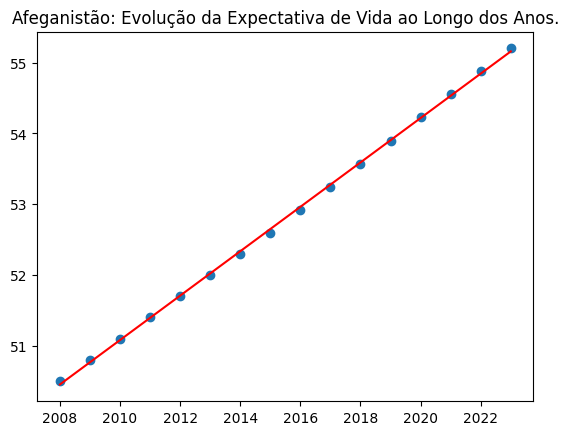

In [112]:
plt.scatter(X,Y)
plt.title('Afeganistão: Evolução da Expectativa de Vida ao Longo dos Anos.', loc='center')
plt.plot(X,y, color='red')

In [126]:
# Afeganistão: Evolução do PIB per capta pareado com o poder compra ao Longo dos Anos

X = afghanistan_array[:,0]
Y = afghanistan_array[:,2]

n = afghanistan_array[:,0].size

a = (n*np.sum(X*Y) - np.sum(X) * np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

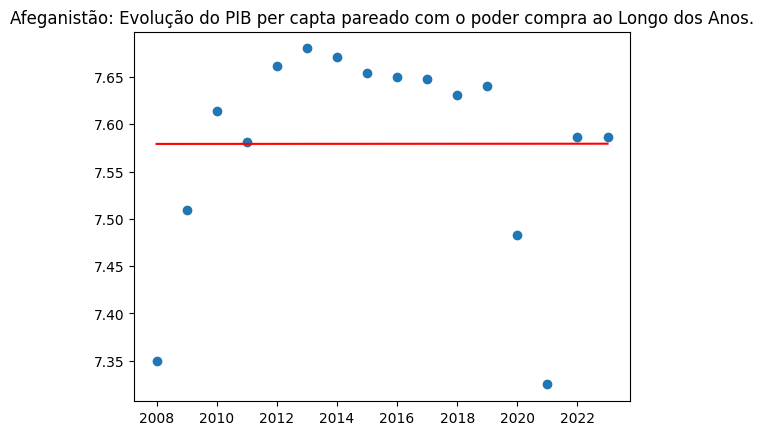

In [127]:
plt.scatter(X,Y)
plt.title('Afeganistão: Evolução do PIB per capta pareado com o poder compra ao Longo dos Anos.', loc='center')
plt.plot(X,y, color='red')

In [122]:
# Afeganistão: Evolução da ajuda social proveniente do governo ao Longo dos Anos

X = afghanistan_array[:,0]
Y = afghanistan_array[:,3]

n = afghanistan_array[:,0].size

a = (n*np.sum(X*Y) - np.sum(X) * np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

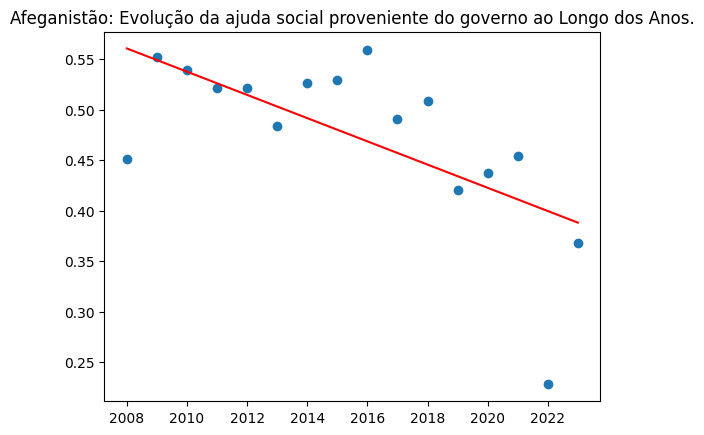

In [125]:
plt.scatter(X,Y)
plt.title('Afeganistão: Evolução da ajuda social proveniente do governo ao Longo dos Anos.', loc='center')
plt.plot(X,y, color='red')

In [128]:
# Afeganistão: Evolução da percepção da corrupção por parte da sociedade ao Longo dos Anos

X = afghanistan_array[:,0]
Y = afghanistan_array[:,7]

n = afghanistan_array[:,0].size

a = (n*np.sum(X*Y) - np.sum(X) * np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

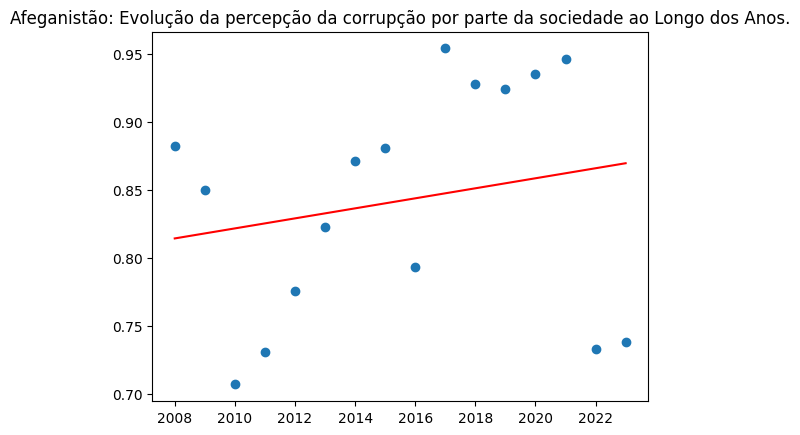

In [130]:
plt.scatter(X,Y)
plt.title('Afeganistão: Evolução da percepção da corrupção por parte da sociedade ao Longo dos Anos.', loc='center')
plt.plot(X,y, color='red')

In [ ]:
'''Concluímos com as análises dos indicativos socioculturais do Afeganistão um contraponto que contrasta com o que foi inferido dos dados finlandeses.
A irregularidade de informações, como a percepção de corrupção, pode ser um forte indicativo de uma sociedade politicamente polarizada e pouco democrática,
motivada por diversas razões que circundam o contexto principal do país: a ocupação talibã desde 2021. Em contrapartida, um parâmetro que exibe continuidade é percebido justamente
na queda da ajuda social proveniente do Estado e no crescimento, praticamente linear, da expectativa de vida do país asiático. As duas primeiras informações adquiridas dos gráficos
se relacionam com o contexto mencionado que ocorreu após a retirada de tropas internacionais. Ocupações estrangeiras, diversidade étnica e restrições sexistas fragmentam a
sociedade em tribos sociais com interesses e noções de cidadania completamente singulares, possivelmente resultando na ausência de um sentimento coletivo.
  '''
